# 🛒 Online Retail - Data Analysis Project
## 📌 Project Overview
This is a data science project based on an online retail dataset. The goal is to perform data cleaning, exploratory data analysis (EDA), and generate basic visualizations to understand sales patterns, top-selling products, and customer behavior.
## 🎯 Objectives
- Clean and prepare the data.
- Explore and visualize sales trends.
- Identify top-selling products.
- Analyze customer spending behavior.
## 🛠️ Tools & Libraries
- Python
- Pandas
- NumPy
- Matplotlib / Seaborn
Let’s dive into the data! 🔍

## 📥 Importing Data

In this step, we load the dataset from an Excel file into a Pandas DataFrame for analysis.  
We'll also preview a few rows to ensure the data has loaded correctly.


In [2]:
import pandas as pd
df = pd.read_excel("online_retail_mock_10000-1.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,221958,A100,Red vase,27,2021-01-01 00:00:00,12.69,40805,Germany
1,771155,C300,Green bowl,24,2021-01-01 01:00:00,40.36,56456,France
2,231932,A100,White mug,12,2021-01-01 02:00:00,20.31,15669,Germany
3,465838,C300,Blue plate,18,2021-01-01 03:00:00,23.47,34897,France
4,359178,D400,Red vase,45,2021-01-01 04:00:00,32.67,15279,Germany


## 📊 Data Overview

We begin by exploring the basic structure of the dataset:
- Dimensions and column names
- Data types
- Summary statistics
- Missing values


In [3]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types:" , df.dtypes)
print("\nSummary statistics:", df.describe())
print("\nMissing values:", df.isnull().sum())

Shape of dataset: (10000, 8)

Column names:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Data types: InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

Summary statistics:            InvoiceNo      Quantity          InvoiceDate     UnitPrice  \
count   10000.000000  10000.000000                10000  10000.000000   
mean   553200.087400     25.067400  2021-07-28 07:30:00     25.676334   
min    100126.000000      1.000000  2021-01-01 00:00:00      1.000000   
25%    328114.500000     13.000000  2021-04-15 03:45:00     13.540000   
50%    553479.500000     25.000000  2021-07-28 07:30:00     25.835000   
75%    779425.250000     37.000000  2021-11-09 11:15:00     37.890000   
max    999885.000000     49.000000  2022-02-21 15

## 🧹 Data Cleaning

We clean the dataset to remove irrelevant or invalid entries:
- Drop rows with missing `CustomerID`
- Filter out negative or zero `Quantity` and `UnitPrice`
- Convert `InvoiceDate` to datetime format
- Create a new `TotalPrice` column (Quantity × UnitPrice)


In [4]:
df = df.dropna(subset=['CustomerID'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    10000 non-null  int64         
 1   StockCode    10000 non-null  object        
 2   Description  10000 non-null  object        
 3   Quantity     10000 non-null  int64         
 4   InvoiceDate  10000 non-null  datetime64[ns]
 5   UnitPrice    10000 non-null  float64       
 6   CustomerID   10000 non-null  int64         
 7   Country      10000 non-null  object        
 8   TotalPrice   10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 703.3+ KB


## 📈 Exploratory Data Analysis (EDA)

In this section, we explore the cleaned dataset using simple visualizations and summaries to answer questions like:
- Which countries generate the most revenue?
- What are the top-selling products?
- How does revenue change over time?

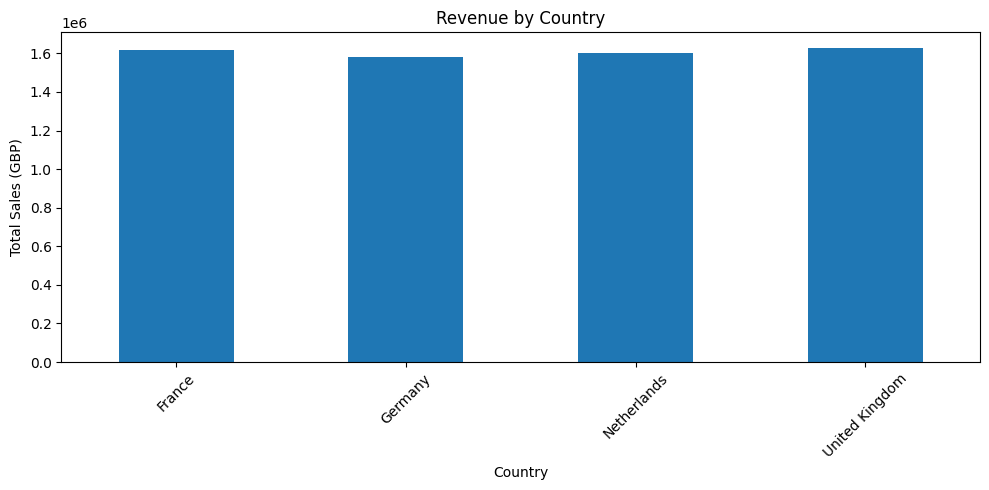

In [5]:
import matplotlib.pyplot as plt
country_sales = df.groupby('Country')['TotalPrice'].sum()
country_sales.plot(kind='bar', figsize=(10, 5), title= ("Revenue by Country"), ylabel= "Total Sales (GBP)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🏆 Top 10 Best-Selling Products

We identify the products that generate the highest revenue by summing up TotalPrice for each StockCode and Description.


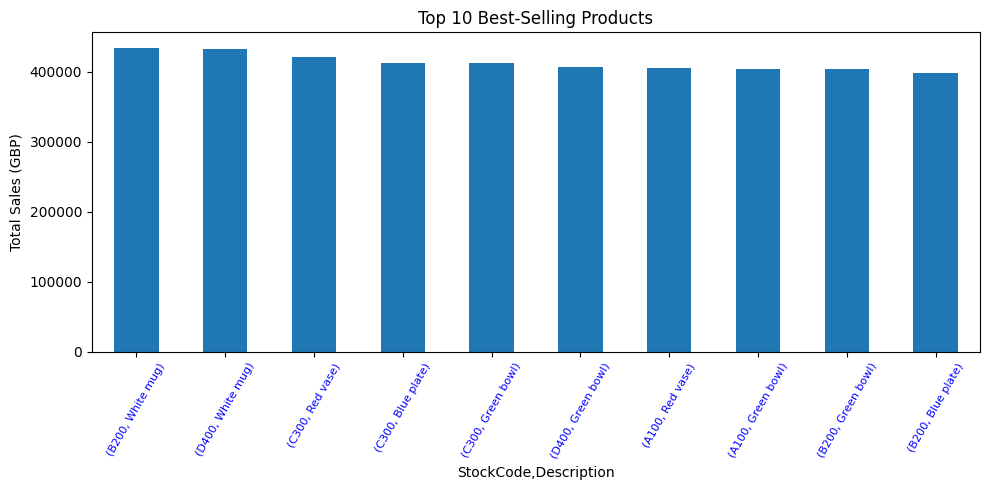

In [6]:
top_products = df.groupby(['StockCode', 'Description'])['TotalPrice'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', figsize=(10, 5), title = "Top 10 Best-Selling Products")
plt.ylabel("Total Sales (GBP)")
plt.xticks(rotation=60, fontsize=8,color='blue')
plt.tight_layout()
plt.show()

## 📅 Daily Revenue Trend

We analyze how total revenue changes over time by aggregating sales on a daily basis.


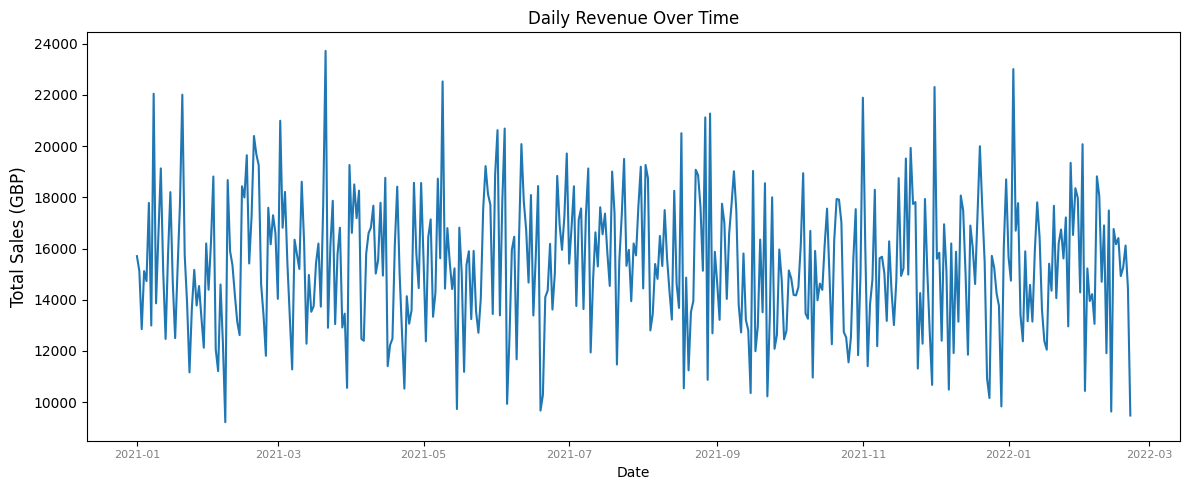

In [10]:
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

daily_sales.plot(kind='line', figsize=(12, 5))
plt.title("Daily Revenue Over Time")
plt.xlabel("Date", fontsize=10)
plt.ylabel("Total Sales (GBP)", fontsize=12)
plt.xticks(fontsize=8, color='gray')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 👥 Customer Segmentation with RFM

We segment customers based on:
- Recency: How recently a customer made a purchase
- Frequency: How often they purchase
- Monetary: How much they spend

This helps us identify loyal, high-value, or inactive customers.


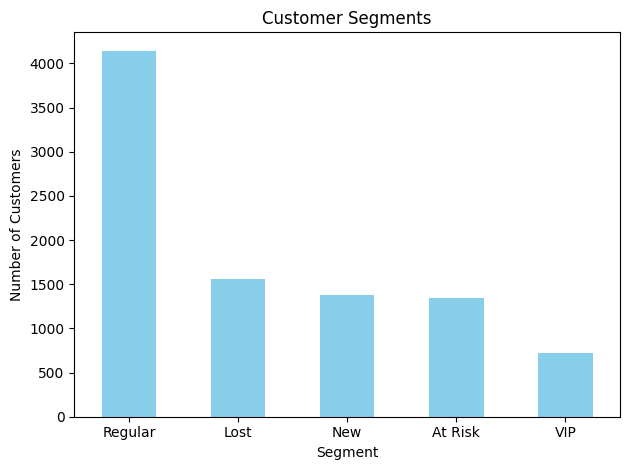

In [7]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm[rfm['Monetary'] > 0]
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)


def segment_customer(row):
    if row['R_score'] >= 4 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'VIP'
    elif row['R_score'] >= 4 and row['F_score'] <= 2:
        return 'New'
    elif row['R_score'] <= 2 and row['F_score'] >= 4:
        return 'At Risk'
    elif row['R_score'] <= 2 and row['F_score'] <= 2:
        return 'Lost'
    else:
        return 'Regular'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

rfm.head()

rfm['Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
